In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv(r"C:\Users\Harshit Gupta\Downloads\Project-Housing_splitted\train.csv")

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
6         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
7         Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
8         Lvl    AllPub    Corner       Gtl      Edwards      Feedr   
9         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   
5       Norm     1Fam     2Story            7            5       2006   
6       Norm     1Fam     1Story            5            6       1957   
7       Norm     1Fam     1Story            5            4       1957   
8       Norm     1Fam     1Story            5            7       1965   
9       Norm     1Fam     1.5Fin            5            5       1947   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   
5          2006     Gable  CompShg     VinylSd     VinylSd       None   
6          1996       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
7          2000     Gable  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
8          1965       Hip  CompShg     MetalSd     MetalSd       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   
5         0.0        Gd        TA      PConc       Gd       TA           Av   
6       180.0        TA        TA     CBlock       Gd       TA           No   
7        67.0        TA        TA     CBlock       TA       TA           No   
8         0.0        TA        TA     CBlock       TA       TA     

In [6]:
df_train.shape

(1168, 81)

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_train.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

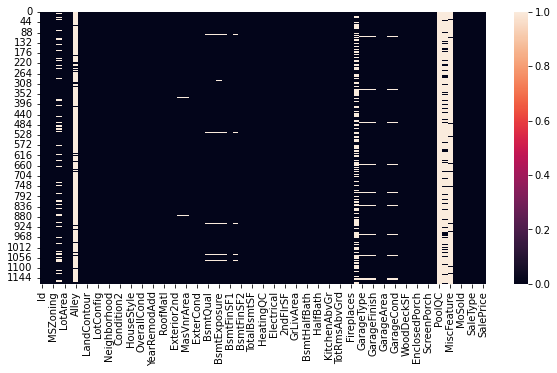

In [9]:
plt.figure(figsize=[10, 5])
sns.heatmap(df_train.isnull())

We can clearly see that few rows has null values:

1. LotFrontage has 214 null values

2. Alley has 1091 null values

3. BsmtQual has 30 null values

4. BsmtCond has 30 null values

5. BsmtExposure has 31 null values

6. BsmtFinType1 has 30 null values

7. BsmtFinType2 has 31 null values

8. FireplaceQu has 551 null values

9. GarageType has 64 null values

10. GarageYrBlt has 64 null values

11. GarageFinish has 64 null values

12. GarageQual has 64 null values

13. GarageCond has 64 null values

14. PoolQC has 1161 null values

15. Fence has 931 null values

16. MiscFeature has 1124 null values

In [10]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

## Test Dataset

In [12]:
df_test = pd.read_csv(r"C:\Users\Harshit Gupta\Downloads\Project-Housing_splitted\test.csv")

In [13]:
df_test.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   
5   650         180       RM         21.0     1936   Pave   NaN      Reg   
6  1453         180       RM         35.0     3675   Pave   NaN      Reg   
7   152          20       RL        107.0    13891   Pave   NaN      Reg   
8   427          80       RL          NaN    12800   Pave   NaN      Reg   
9   776         120       RM         32.0     4500   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
5         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
6         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
7         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
8         Low    AllPub    Inside       Mod      SawyerW       Norm   
9         Lvl    AllPub       FR2       Gtl      Mitchel       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   
5       Norm    Twnhs     SFoyer            4            6       1970   
6       Norm   TwnhsE       SLvl            5            5       2005   
7       Norm     1Fam     1Story            8            5       2007   
8       Norm     1Fam       SLvl            7            5       1989   
9       Norm   TwnhsE     1Story            6            5       1998   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
5          1970     Gable  CompShg     CemntBd     CmentBd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd    BrkFace   
7          2008       Hip  CompShg     VinylSd     VinylSd      Stone   
8          1989     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
9          1998       Hip  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   
5         0.0        TA        TA     CBlock       Gd       TA           Av   
6        80.0        TA        TA      PConc       Gd       TA           Gd   
7       436.0        Gd        TA      PConc       Ex       TA           Gd   
8       145.0        Gd        TA      PConc       Gd       TA     

In [14]:
df_test.shape

(292, 80)

In [15]:

df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

<AxesSubplot:>

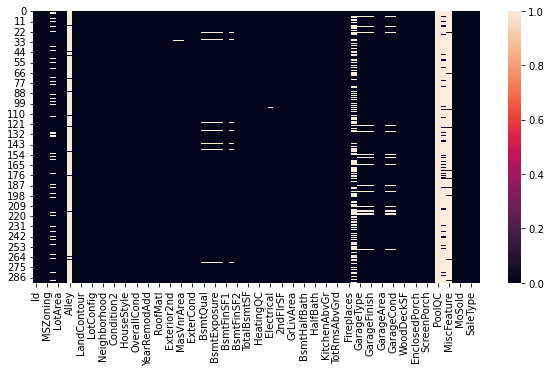

In [17]:
plt.figure(figsize=[10,5])
sns.heatmap(df_test.isnull())

In [18]:

df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

## Concanitaing the Train and Test Dataset for a better understanding

In [20]:
df_train['Source']='train'
df_test['Source']='test'
df=pd.concat([df_train,df_test],ignore_index=True)

In [21]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [22]:
df.shape

(1460, 82)

In [23]:
numerical=df.select_dtypes(include=[np.number]).columns
categorical=df.select_dtypes(include=[np.object]).columns

In [24]:
numerical

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [25]:
categorical

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Source'],
      dtype='object')

In [26]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

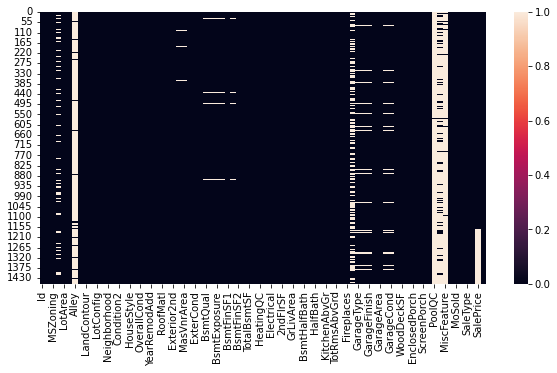

In [27]:
plt.figure(figsize=[10,5])
sns.heatmap(df.isnull())

## Handling Missing Values

In [28]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [29]:
df['PoolQC'].fillna('NA', inplace = True)

In [30]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [31]:
df['MiscFeature'].fillna('NA', inplace= True)

In [32]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [33]:
df['Alley'].fillna('NA', inplace = True)

In [34]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [35]:
df['Fence'].fillna('NA', inplace= True)

In [36]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [37]:
df['FireplaceQu'].fillna('NA', inplace = True)

In [38]:
df['LotFrontage'].mean()

70.04995836802665

In [39]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [40]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [41]:
df['GarageType'].fillna('NA', inplace=True)

In [42]:
df['GarageYrBlt'].fillna('NA', inplace = True)

In [43]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [45]:
# Replacing the missing values with 'NA'  to show garage option is not available

df['GarageFinish'].fillna('NA', inplace=True)

In [46]:
# Replacing the missing values with 'NA' to show Garage is not available

df['GarageQual'].fillna('NA', inplace=True)

In [47]:
# Replacing the missing values with 'NA'

df['GarageCond'].fillna('NA', inplace=True)

In [48]:
# Replacing the missing values with NA 

df['BsmtFinType2'].fillna('NA', inplace=True)

In [49]:
# Replacing the missing values with 'NA'

df['BsmtExposure'].fillna('NA', inplace=True)

In [50]:
# Replacing the missing values with 'NA'

df['BsmtQual'].fillna('NA', inplace=True)

In [51]:
# Replacing the missing  values with 'NA'

df['BsmtCond'].fillna('NA', inplace=True)

In [52]:
# Replacing the missing values with 'NA'

df['BsmtFinType1'].fillna('NA', inplace=True)

In [53]:
# Checking for the value counts

df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [54]:
# Replacing the missing values with 'None'

df['MasVnrType'].fillna('None', inplace=True)

In [55]:
# Calculating the mean value

df['MasVnrArea'].mean()

103.68526170798899

In [56]:
# Replacing the missing values with the mean value

df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [57]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [58]:
# Replacing the missing value with 'SBrkr'

df['Electrical'].fillna('SBrkr', inplace=True)

In [59]:
# Checking for the missing values again:

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

## Data Visualization


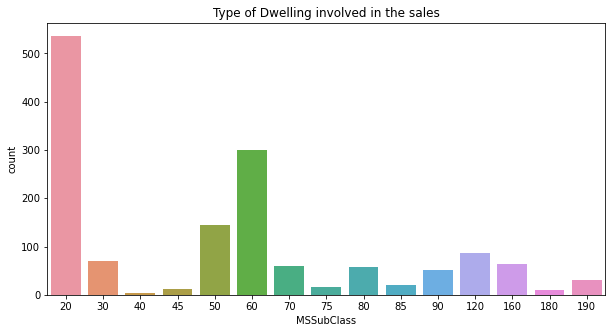

In [60]:
#Visualizing the value counts of the columns MSSubClass

plt.figure(figsize=(10, 5))
sns.countplot(df.MSSubClass) 
plt.title('Type of Dwelling involved in the sales')
plt.show()


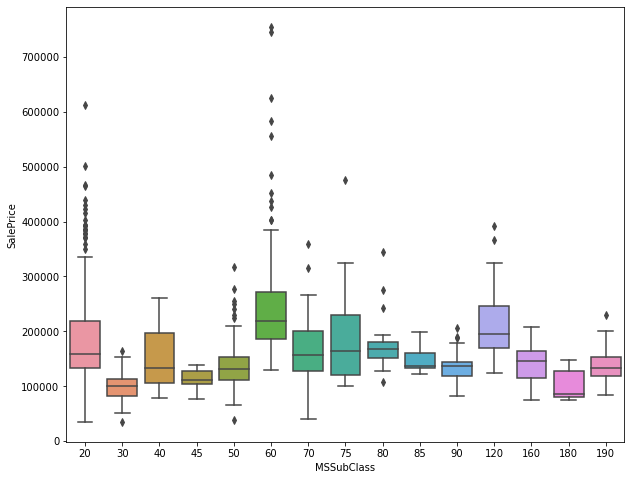

In [61]:
plt.figure(figsize=(10,8))
sns.boxplot(x='MSSubClass',y='SalePrice',data=df.sort_values('SalePrice',ascending=False))
plt.show()

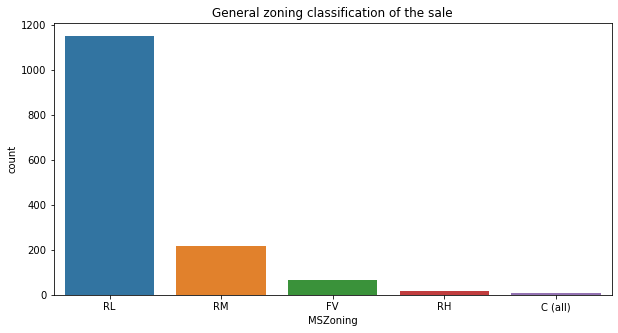

In [62]:
# Checking for the value counts of the column 'MSZoning'(Identifies the general zoning classification of the sale)

plt.figure(figsize=[10,5])
sns.countplot(df.MSZoning)
plt.title('General zoning classification of the sale')
plt.show()

In [63]:
# Let's check for the type of road access to property

df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

Observations:

For Residential Low Density (RL), the maximum prices are ranging between 50,000 to 4,00,000.

For Floating Village Residential (FV), the maximum prices are ranging between 150000 to 250000.

In [64]:
# Let's check for the type of road access to property

df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

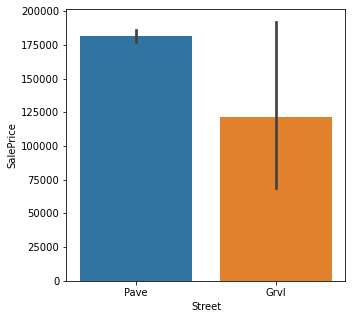

In [65]:
# Checking for the sale price on the basis of road access to the property

plt.figure(figsize=[5,5])
sns.barplot(x='Street', y='SalePrice', data = df.sort_values('SalePrice', ascending=False))

plt.show()

we can observe that the property with the road access of Pave is in more demand and so its price is also high.

<AxesSubplot:ylabel='Alley'>

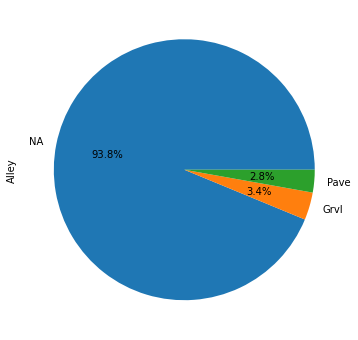

In [66]:
# Let's check for the alley access to property

plt.figure(figsize=[6,6])
df['Alley'].value_counts().plot.pie(autopct='%0.1f%%')

We can see that approx 94% property have no alley access.

<Figure size 576x432 with 0 Axes>

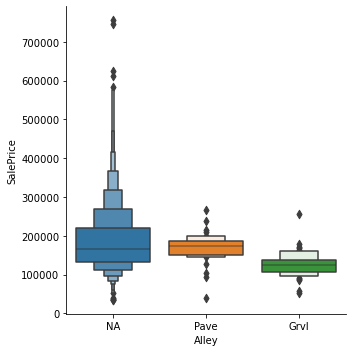

In [67]:
# Let's check the effect of alley access on the sale price.

plt.figure(figsize=[8,6])
sns.catplot(x='Alley', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

We can observe that the effect of alley access to the properties is very less. So, it is better to remove this column as approx 94% of properties has no alley access.

In [68]:
# Dropping the alley column

df = df.drop(['Alley'], axis=1)

df.head() # Checking the dataset after removing the Alley column

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd  

<AxesSubplot:ylabel='LotShape'>

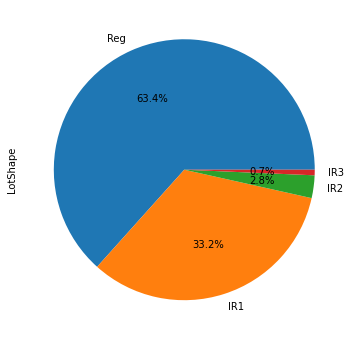

In [69]:
# Let's check for the General shape of property

plt.figure(figsize=[6,6])
df['LotShape'].value_counts().plot.pie(autopct='%0.1f%%')

Observations:

We can see that most of the properties are of regular shape (approx 63%).

Approx 33% properties are of slightly irregular shape.

<Figure size 576x288 with 0 Axes>

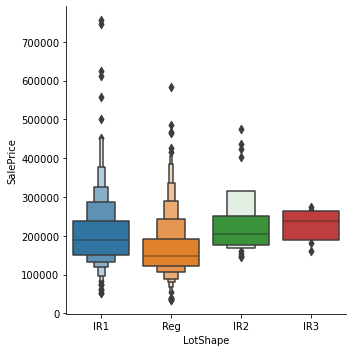

In [70]:
# Checking the relation of property shape on the sale price

plt.figure(figsize=[8,4])
sns.catplot(x='LotShape', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

<AxesSubplot:xlabel='LandContour', ylabel='count'>

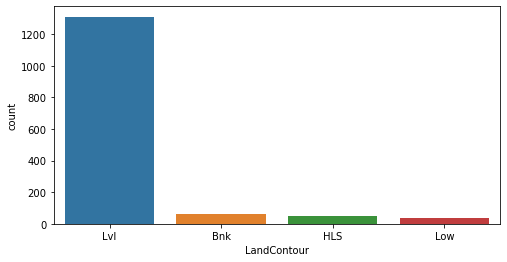

In [71]:
# Let's check for the Flatness of the property

plt.figure(figsize=[8,4])
sns.countplot(df['LandContour'])

Most of the properties are of near flat level

<Figure size 576x288 with 0 Axes>

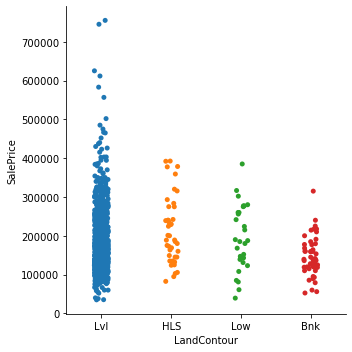

In [72]:
# Let's check for the effect of flatness of the property on the sale price

plt.figure(figsize=[8,4])
sns.catplot(x='LandContour', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

<AxesSubplot:ylabel='Utilities'>

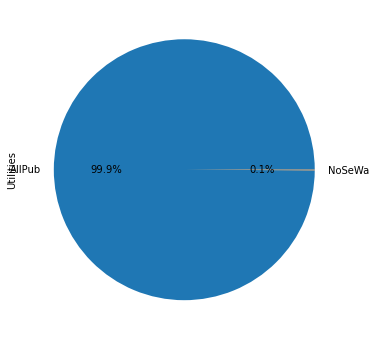

In [73]:
# Let's check for the type of utilities available in the property

plt.figure(figsize=[6,6])
df['Utilities'].value_counts().plot.pie(autopct='%0.1f%%')

We can see that approx 100% properties have all public Utilities (E,G,W,& S). So, we can drop this column as this will not contribute to the dataset in the model building.

In [74]:
# Dropping the 'Utilities' column

df = df.drop(['Utilities'], axis=1)

df.head() # Checking the dataset again

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   
2            7            5       1996          1997     Gable  CompShg   
3            6            6       1977          1977       Hip  CompShg   
4            6            7       1977          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     Plywood     Plywood    BrkFace       480.0        TA        TA   
4     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1        

<AxesSubplot:ylabel='LotConfig'>

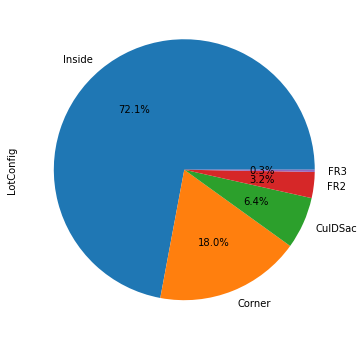

In [75]:
# Let's check for the lot configuration

plt.figure(figsize=[6,6])
df['LotConfig'].value_counts().plot.pie(autopct='%0.1f%%')

Approx 72% properties have inside lot configuration.

18% properties have corner lot.

Only 0.3% properties have frontage on 3 sides of property.

<Figure size 432x288 with 0 Axes>

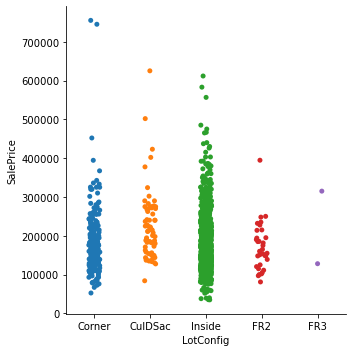

In [76]:
# Checking for the lot configuration and its effect on the sale pricing.

plt.figure(figsize=[6,4])
sns.catplot(x='LotConfig', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

<AxesSubplot:ylabel='LandSlope'>

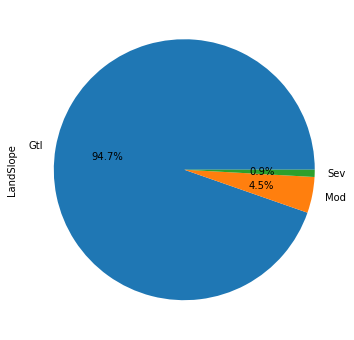

In [77]:
# Let's check for the slope of the property

plt.figure(figsize=[6,6])
df['LandSlope'].value_counts().plot.pie(autopct='%0.1f%%')

Approx 95% properties having gentle slope.

Only approx 1% properties having severe Slope and 4.5% properites having moderate slope.

<Figure size 576x432 with 0 Axes>

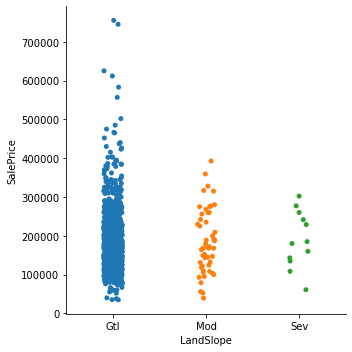

In [78]:
# Cheecking for the slope wise sale pricing of the properties

plt.figure(figsize=[8,6])
sns.catplot(x='LandSlope', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

The maximum gentle slope type properties having the sale price ranging between 100000 to 300000.

In [79]:
# Let's look at the physical locations within Ames city limits

df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

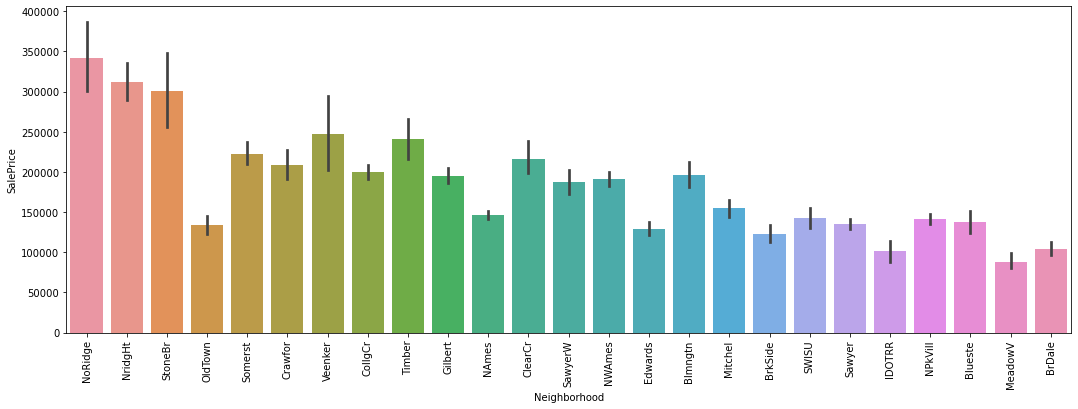

In [80]:
# Checking for the effect of physical locations within Ames city limits on the sale price

plt.figure(figsize=[18,6])
sns.barplot(x='Neighborhood', y='SalePrice', data= df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [81]:
# Let's check for the proximity to various conditions
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [82]:
# Checking for the value counts of Condition2 column (Proximity to various conditions (if more than one is present))

df['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

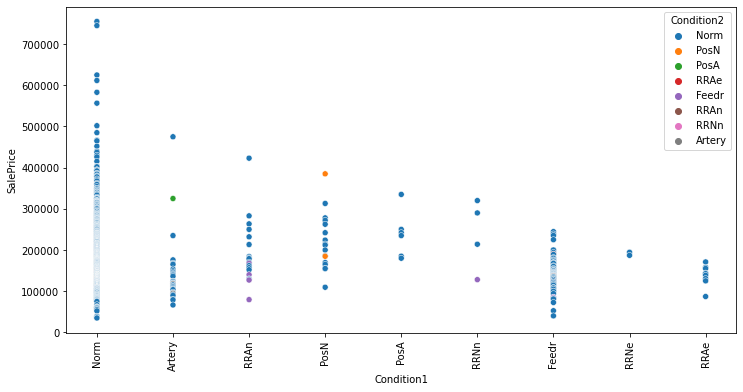

In [83]:
# Checking for the sale pricing proximity wise

plt.figure(figsize=[12,6])
sns.scatterplot(x='Condition1', y='SalePrice', hue='Condition2', data=df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [84]:
# Checking for the value counts of type of dwelling 

df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Single-family Detached dewlling is most popular.

Two-family Conversion; originally built as one-family dwelling is least popular.

In [85]:
# Checking for the value counts of the style of dwelling

df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

One story style of houses are most popular.

Two and one-half story: 2nd level finished style of house is least popular.

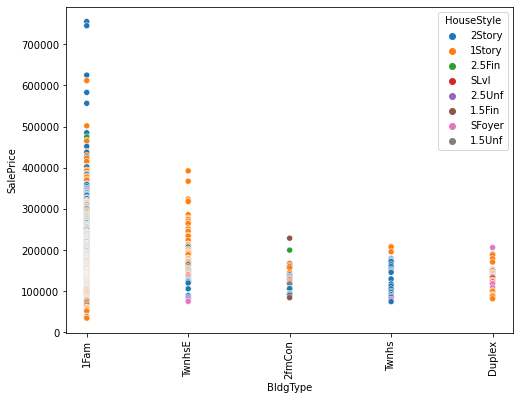

In [86]:
# Let's check for the type & style of dwelling

plt.figure(figsize=[8,6])
sns.scatterplot(x= 'BldgType', y='SalePrice', hue = 'HouseStyle', data = df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation = 90)
plt.show()

In [87]:
# Checking for the value counts of the Rates the overall material and finish of the house

df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

Most of the houses are rated 5 which means the overall material and finish of the houses are average and above average.

Very few houses was rated 1 which says the overall material and finish of very few houses are very poor.



In [89]:
# Checking for the value counts of the rates the overall condition of the house

df['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

Most of the houses are rated average and above average for the overall condition of the house.

None of the houses got the ratings of very excellent.

<Figure size 576x432 with 0 Axes>

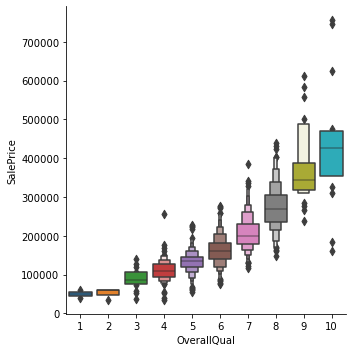

In [90]:
# Let's check for the saleprices based on the ratings of overall material and finish of the house

plt.figure(figsize=[8,6])
sns.catplot(x='OverallQual', y='SalePrice', data = df.sort_values('SalePrice', ascending=False), kind = 'boxen')

plt.show()

We can see that as the ratings are increasing the price of the property is also increasing.

<Figure size 576x432 with 0 Axes>

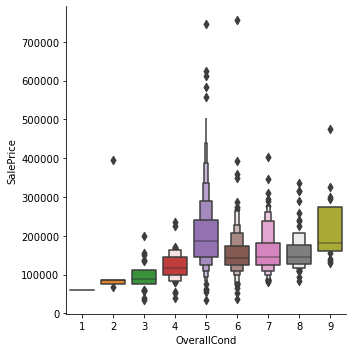

In [91]:
# Let's check for the saleprices based on the ratings of overall condition of the house

plt.figure(figsize=[8,6])
sns.catplot(x='OverallCond', y='SalePrice', data = df.sort_values('SalePrice', ascending=False), kind = 'boxen')

plt.show()

In [92]:
# Let's check for the value counts of type of roof of the houses

df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [93]:
# Checking for the value counts of the material used for the roof.

df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

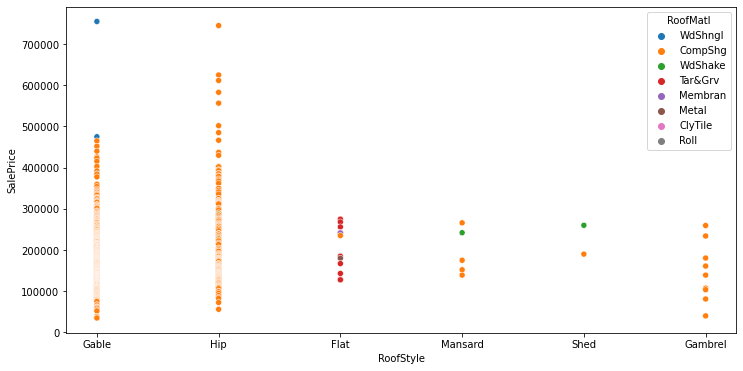

In [94]:
# Let's check for the effect of roof on the sale price

plt.figure(figsize=[12,6])
sns.scatterplot(x='RoofStyle', y='SalePrice', hue = 'RoofMatl', data = df.sort_values('SalePrice', ascending=False))

plt.show()

In [95]:
# Let's check for the value counts of the exterior covering on house

df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [96]:
# Checking for the value counts of the exterior covering on house (if more than one material)

df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

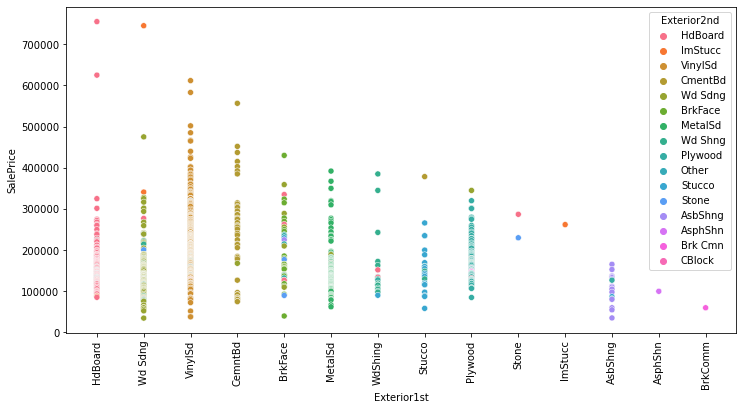

In [97]:
# Let's check for the exterior covering on the house and its effect on the sale price

plt.figure(figsize=[12,6])
sns.scatterplot(x='Exterior1st', y='SalePrice', hue = 'Exterior2nd', data = df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [98]:
# Let's check for the value counts of the masonry veneer type

df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

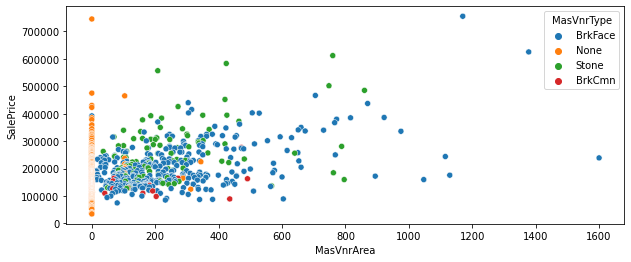

In [99]:
# Let's check for the sale price based on the masonry veneer

plt.figure(figsize=[10,4])
sns.scatterplot(x='MasVnrArea', y='SalePrice', hue = 'MasVnrType', data = df.sort_values('SalePrice', ascending=False))

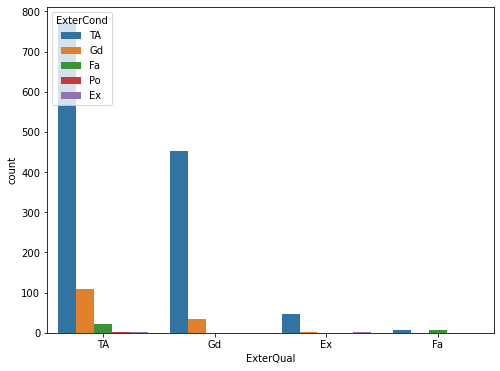

In [100]:
#Let's check for the value counts of the quality of the material on the exterior

plt.figure(figsize=[8,6])
sns.countplot(x='ExterQual', hue = 'ExterCond', data = df)
plt.show()

Most of the houses are of average/typical quality of the material on the exterior.

None houses have poor quality of material on the exterior.

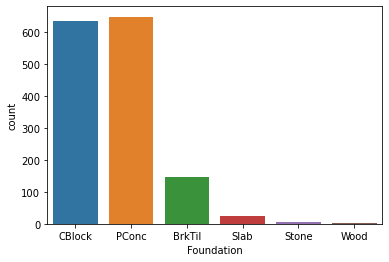

In [101]:
# Let's check for the type of foundation

plt.figure(figsize=[6,4])
sns.countplot(x='Foundation', data = df)

plt.show()

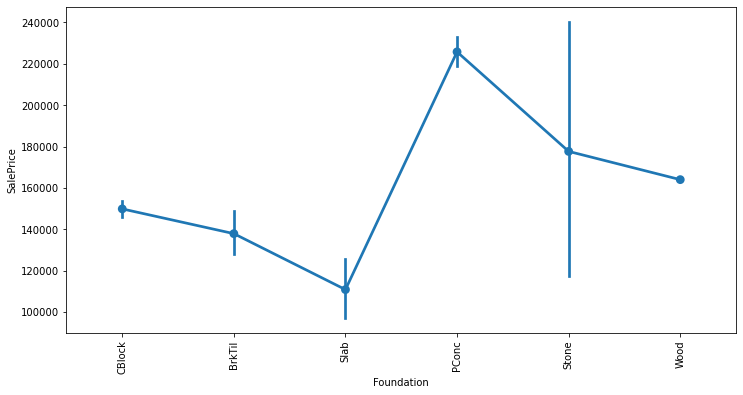

In [102]:
# Let's check for the effect of foundation on the sale price

plt.figure(figsize=[12,6])
sns.pointplot(x='Foundation', y = 'SalePrice', data=df.sort_values('SalePrice'))
plt.xticks(rotation=90)
plt.show()

In [103]:
# Let's check for the central air conditioning

df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

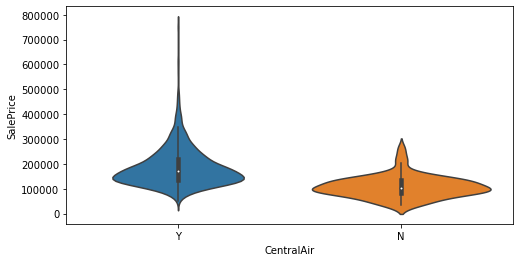

In [104]:
# Checking for the price of the houses on the basis of air conditioning

plt.figure(figsize=[8,4])
sns.violinplot(x='CentralAir', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

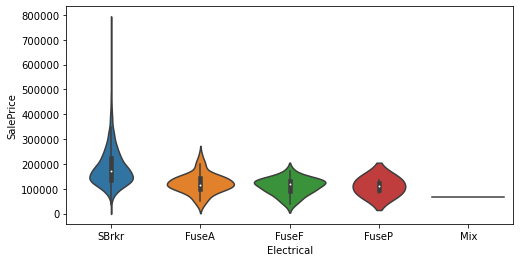

In [105]:
# Let's check for the electrical system of the house

plt.figure(figsize=[8,4])
sns.violinplot(x='Electrical', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

In [106]:
# Let's check value count for the home functionality (Assume typical unless deductions are warranted)

df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

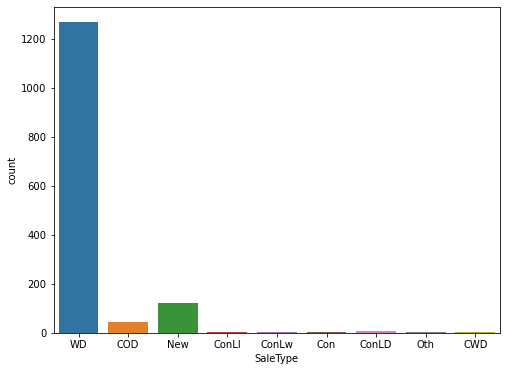

In [107]:
# Let's check for the sale type

plt.figure(figsize=[8,6])
sns.countplot(df['SaleType'])
plt.show()

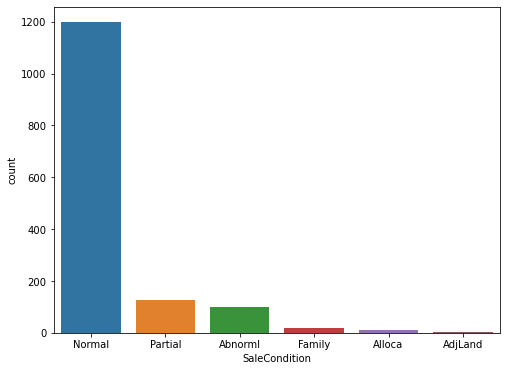

In [108]:
# Checking for the value counts of the condition of sale

plt.figure(figsize=[8,6])
sns.countplot(df['SaleCondition'])
plt.show()

Most of the sale are normal sale.

## Label Encoding the categorical column:

In [109]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_columns = ('MSZoning', 'Street','LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Source')

for c in cat_columns:
    le.fit(list(df[c].values))
    le.classes_
    df[c] = le.transform(list(df[c].values))

In [110]:
# Checking the dataset again after label encoding

df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3    70.049958     4928       1         0   
1  889          20         3    95.000000    15865       1         0   
2  793          60         3    92.000000     9920       1         0   
3  110          20         3   105.000000    11751       1         0   
4  422          20         3    70.049958    16635       1         0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            3          4          0            13           2           2   
1            3          4          1            12           2           2   
2            3          1          0            15           2           2   
3            3          4          0            14           2           2   
4            3          2          0            14           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         4           2            6            5       1976          1976   
1         0           2            8            6       1970          1970   
2         0           5            7            5       1996          1997   
3         0           2            6            6       1977          1977   
4         0           2            6            7       1977          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1            9           10           2         0.0   
1          0         5           13           14           2         0.0   
2          1         1            8            8           2         0.0   
3          3         1            9           10           1       480.0   
4          1         1            5            5           3       126.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          4           1         2         4             4   
1          2          2           2         4         1             1   
2          2          4           2         2         4             0   
3          3          4           1         2         4             4   
4          2          4           1         2         4             4   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0         120             6           0        958         1078   
1             0         351             5         823       1043         2217   
2             2         862             6           0        255         1117   
3             1         705             6           0       1139         1844   
4             0        1246             6           0        356         1602   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          4           1           4       958         0   
1        1          0           1           4      2217         0   
2        1          0           1           4      1127       886   
3        1          0           1           4      1844         0   
4        1          2           1           4      1602         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1            3             5           6   
1             4             1            2             8           6   
2             3             1            3             8           6   
3             3             1            3             7           6   
4     

## Checking for the data distribution among all the columns:

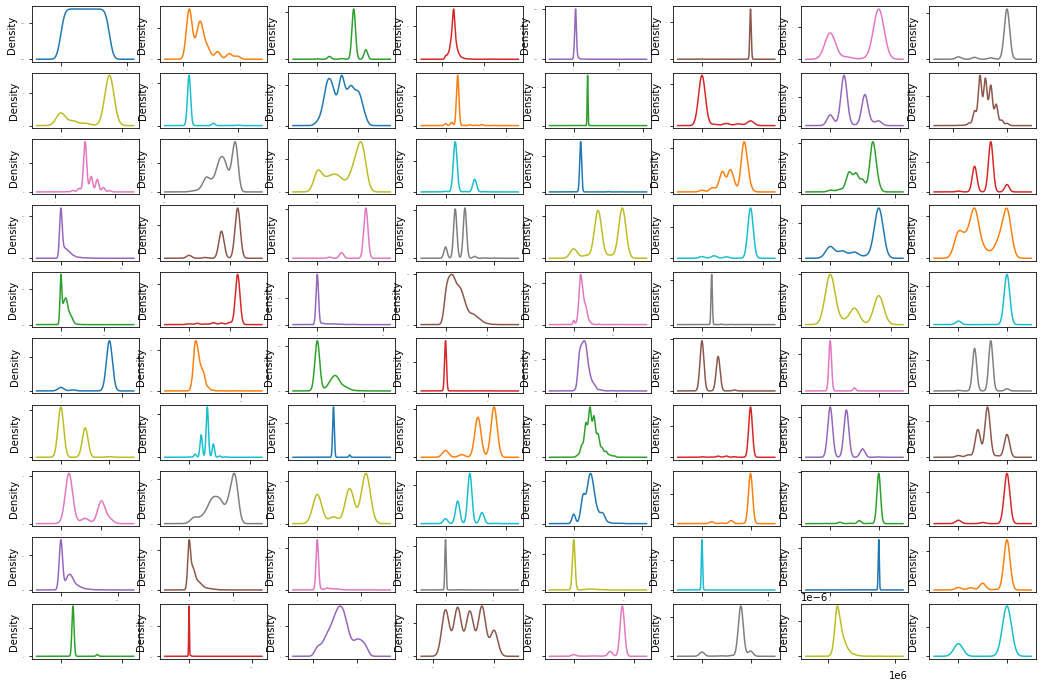

In [111]:
df.plot(kind='density', subplots=True, layout=(10,8), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

The above graph shows that skewness is present in the dataset.

## Statistical Overview of the the Dataset

In [112]:
df.describe()

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean    730.500000    56.897260     3.028767    70.049958   10516.828082   
std     421.610009    42.300571     0.632017    22.024023    9981.264932   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     365.750000    20.000000     3.000000    60.000000    7553.500000   
50%     730.500000    50.000000     3.000000    70.049958    9478.500000   
75%    1095.250000    70.000000     3.000000    79.000000   11601.500000   
max    1460.000000   190.000000     4.000000   313.000000  215245.000000   

            Street     LotShape  LandContour    LotConfig    LandSlope  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.995890     1.942466     2.777397     3.019178     0.062329   
std       0.063996     1.409156     0.707666     1.622634     0.276232   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     3.000000     2.000000     0.000000   
50%       1.000000     3.000000     3.000000     4.000000     0.000000   
75%       1.000000     3.000000     3.000000     4.000000     0.000000   
max       1.000000     3.000000     3.000000     4.000000     2.000000   

       Neighborhood   Condition1   Condition2     BldgType   HouseStyle  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      12.251370     2.031507     2.008219     0.493151     3.038356   
std        6.013735     0.868515     0.259040     1.198277     1.911305   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        7.000000     2.000000     2.000000     0.000000     2.000000   
50%       12.000000     2.000000     2.000000     0.000000     2.000000   
75%       17.000000     2.000000     2.000000     0.000000     5.000000   
max       24.000000     8.000000     7.000000     4.000000     7.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd    RoofStyle  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753     1.410274   
std       1.382997     1.112799    30.202904     20.645407     0.834998   
min       1.000000     1.000000  1872.000000   1950.000000     0.000000   
25%       5.000000     5.000000  1954.000000   1967.000000     1.000000   
50%       6.000000     5.000000  1973.000000   1994.000000     1.000000   
75%       7.000000     6.000000  2000.000000   2004.000000     1.000000   
max      10.000000     9.000000  2010.000000   2010.000000     5.000000   

          RoofMatl  Exterior1st  Exterior2nd   MasVnrType   MasVnrArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      1.075342     9.624658    10.339726     1.762329   103.685262   
std       0.599127     3.197659     3.540570     0.614274   180.569112   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     8.000000     8.000000     1.000000     0.000000   
50%       1.000000    12.000000    13.000000     2.000000     0.000000   
75%       1.000000    12.000000    13.000000     2.000000   164.250000   
max       7.000000    14.000000    15.000000     3.000000  1600.000000   

         ExterQual    ExterCond   Foundation     BsmtQual     BsmtCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      2.539726     3.733562     1.396575     2.724658     3.691096   
std       0.693995     0.731807     0.722394     1.278630     0.949616   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     4.000000     1.000000     2.000000     4.000000   
50%       3.000000     4.000000     1.000000     2.000000     4.000000   
75%       3.000000     4.000000     2.000000     4.000000     4.000000   
max       3.000000     4.000000     5.000000     4.00

## Checking the Co-relation

In [113]:
df.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096    -0.009601 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.357056 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.106363 -0.034452   
LotFrontage   -0.009601   -0.357056 -0.106363     1.000000  0.306795   
LotArea       -0.033226   -0.139781 -0.034452     0.306795  1.000000   
Street         0.008916   -0.024969  0.087654    -0.037323 -0.197131   
LotShape       0.032122    0.119289  0.061887    -0.144931 -0.165315   
LandContour   -0.019659   -0.002940 -0.017854    -0.075647 -0.149083   
LotConfig      0.049756    0.075910 -0.009895    -0.181253 -0.121161   
LandSlope      0.005847   -0.025672 -0.022055     0.067608  0.436868   
Neighborhood  -0.013735   -0.005985 -0.249679     0.084545  0.044569   
Condition1    -0.003815   -0.024762 -0.027874    -0.008483  0.023846   
Condition2     0.001839   -0.042395  0.044606     0.003214  0.022164   
BldgType       0.021912    0.746063  0.005690    -0.408564 -0.205721   
HouseStyle     0.018111    0.397161 -0.105315     0.031907 -0.033190   
OverallQual   -0.028365    0.032628 -0.160099     0.234196  0.105806   
OverallCond    0.012609   -0.059316  0.186951    -0.052820 -0.005636   
YearBuilt     -0.012713    0.027850 -0.308908     0.117598  0.014228   
YearRemodAdd  -0.021998    0.040581 -0.174728     0.082746  0.013788   
RoofStyle      0.038675   -0.117817 -0.000301     0.153467  0.077054   
RoofMatl      -0.022562   -0.031336  0.005133     0.082026  0.149837   
Exterior1st   -0.034694   -0.089159 -0.008558     0.074448  0.004256   
Exterior2nd   -0.042847   -0.137229  0.006963     0.098756 -0.003930   
MasVnrType     0.051971   -0.029850 -0.028279    -0.020220 -0.008122   
MasVnrArea    -0.050199    0.022895 -0.066766     0.179283  0.103960   
ExterQual      0.001689   -0.017161  0.200536    -0.183293 -0.057275   
ExterCond      0.029826   -0.003254 -0.096041     0.047951  0.015160   
Foundation     0.008514    0.058126 -0.235174     0.098809 -0.011081   
BsmtQual       0.047668   -0.081702  0.160778    -0.139701 -0.061495   
BsmtCond       0.007223   -0.017905 -0.011450     0.055936  0.016715   
BsmtExposure  -0.025879   -0.065218  0.037108    -0.130047 -0.152436   
BsmtFinType1   0.016616    0.006437  0.026347    -0.023136 -0.057081   
BsmtFinSF1    -0.005024   -0.069836 -0.049128     0.215828  0.214103   
BsmtFinType2   0.045877    0.037025 -0.034004    -0.017142 -0.056425   
BsmtFinSF2    -0.005968   -0.065649  0.028086     0.043340  0.111170   
BsmtUnfSF     -0.007940   -0.140759 -0.046749     0.122156 -0.002618   
TotalBsmtSF   -0.015415   -0.238518 -0.087834     0.363358  0.260833   
Heating        0.042120    0.048009  0.056866    -0.020815  0.028158   
HeatingQC      0.002157    0.020760  0.134279    -0.079975  0.004212   
CentralAir     0.009821   -0.101774 -0.049523     0.068666  0.049755   
Electrical     0.037632    0.051945 -0.070818     0.060213  0.043856   
1stFlrSF       0.010496   -0.251758 -0.055614     0.414266  0.299475   
2ndFlrSF       0.005590    0.307886 -0.051481     0.072483  0.050986   
LowQualFinSF  -0.044230    0.046474  0.011520     0.036849  0.004779   
GrLivArea      0.008273    0.074853 -0.082615     0.368392  0.263116   
BsmtFullBath   0.002289    0.003491 -0.018526     0.091481  0.158155   
BsmtHalfBath  -0.020155   -0.002333  0.007193    -0.006419  0.048046   
FullBath       0.005587    0.131608 -0.198290     0.180424  0.126031   
HalfBath       0.006784    0.177354 -0.133876     0.048258  0.014259   
BedroomAbvGr   0.037719   -0.023438 -0.016471     0.237023  0.119690   
KitchenAbvGr   0.002951    0.281721  0.049434    -0.005805 -0.017784   
KitchenQual   -0.004432    0.010129  0.128976    -0.189082 -0.057018   
TotRmsAbvGrd   0.027239    0.040380 -0.043200     0.320146  0.190015   
Functional    -0.001064    0.003711 -0.095722     0.030250 -0.022317   
Fireplaces    -0.019772   -0.045569 -0.011349     0.235755  0

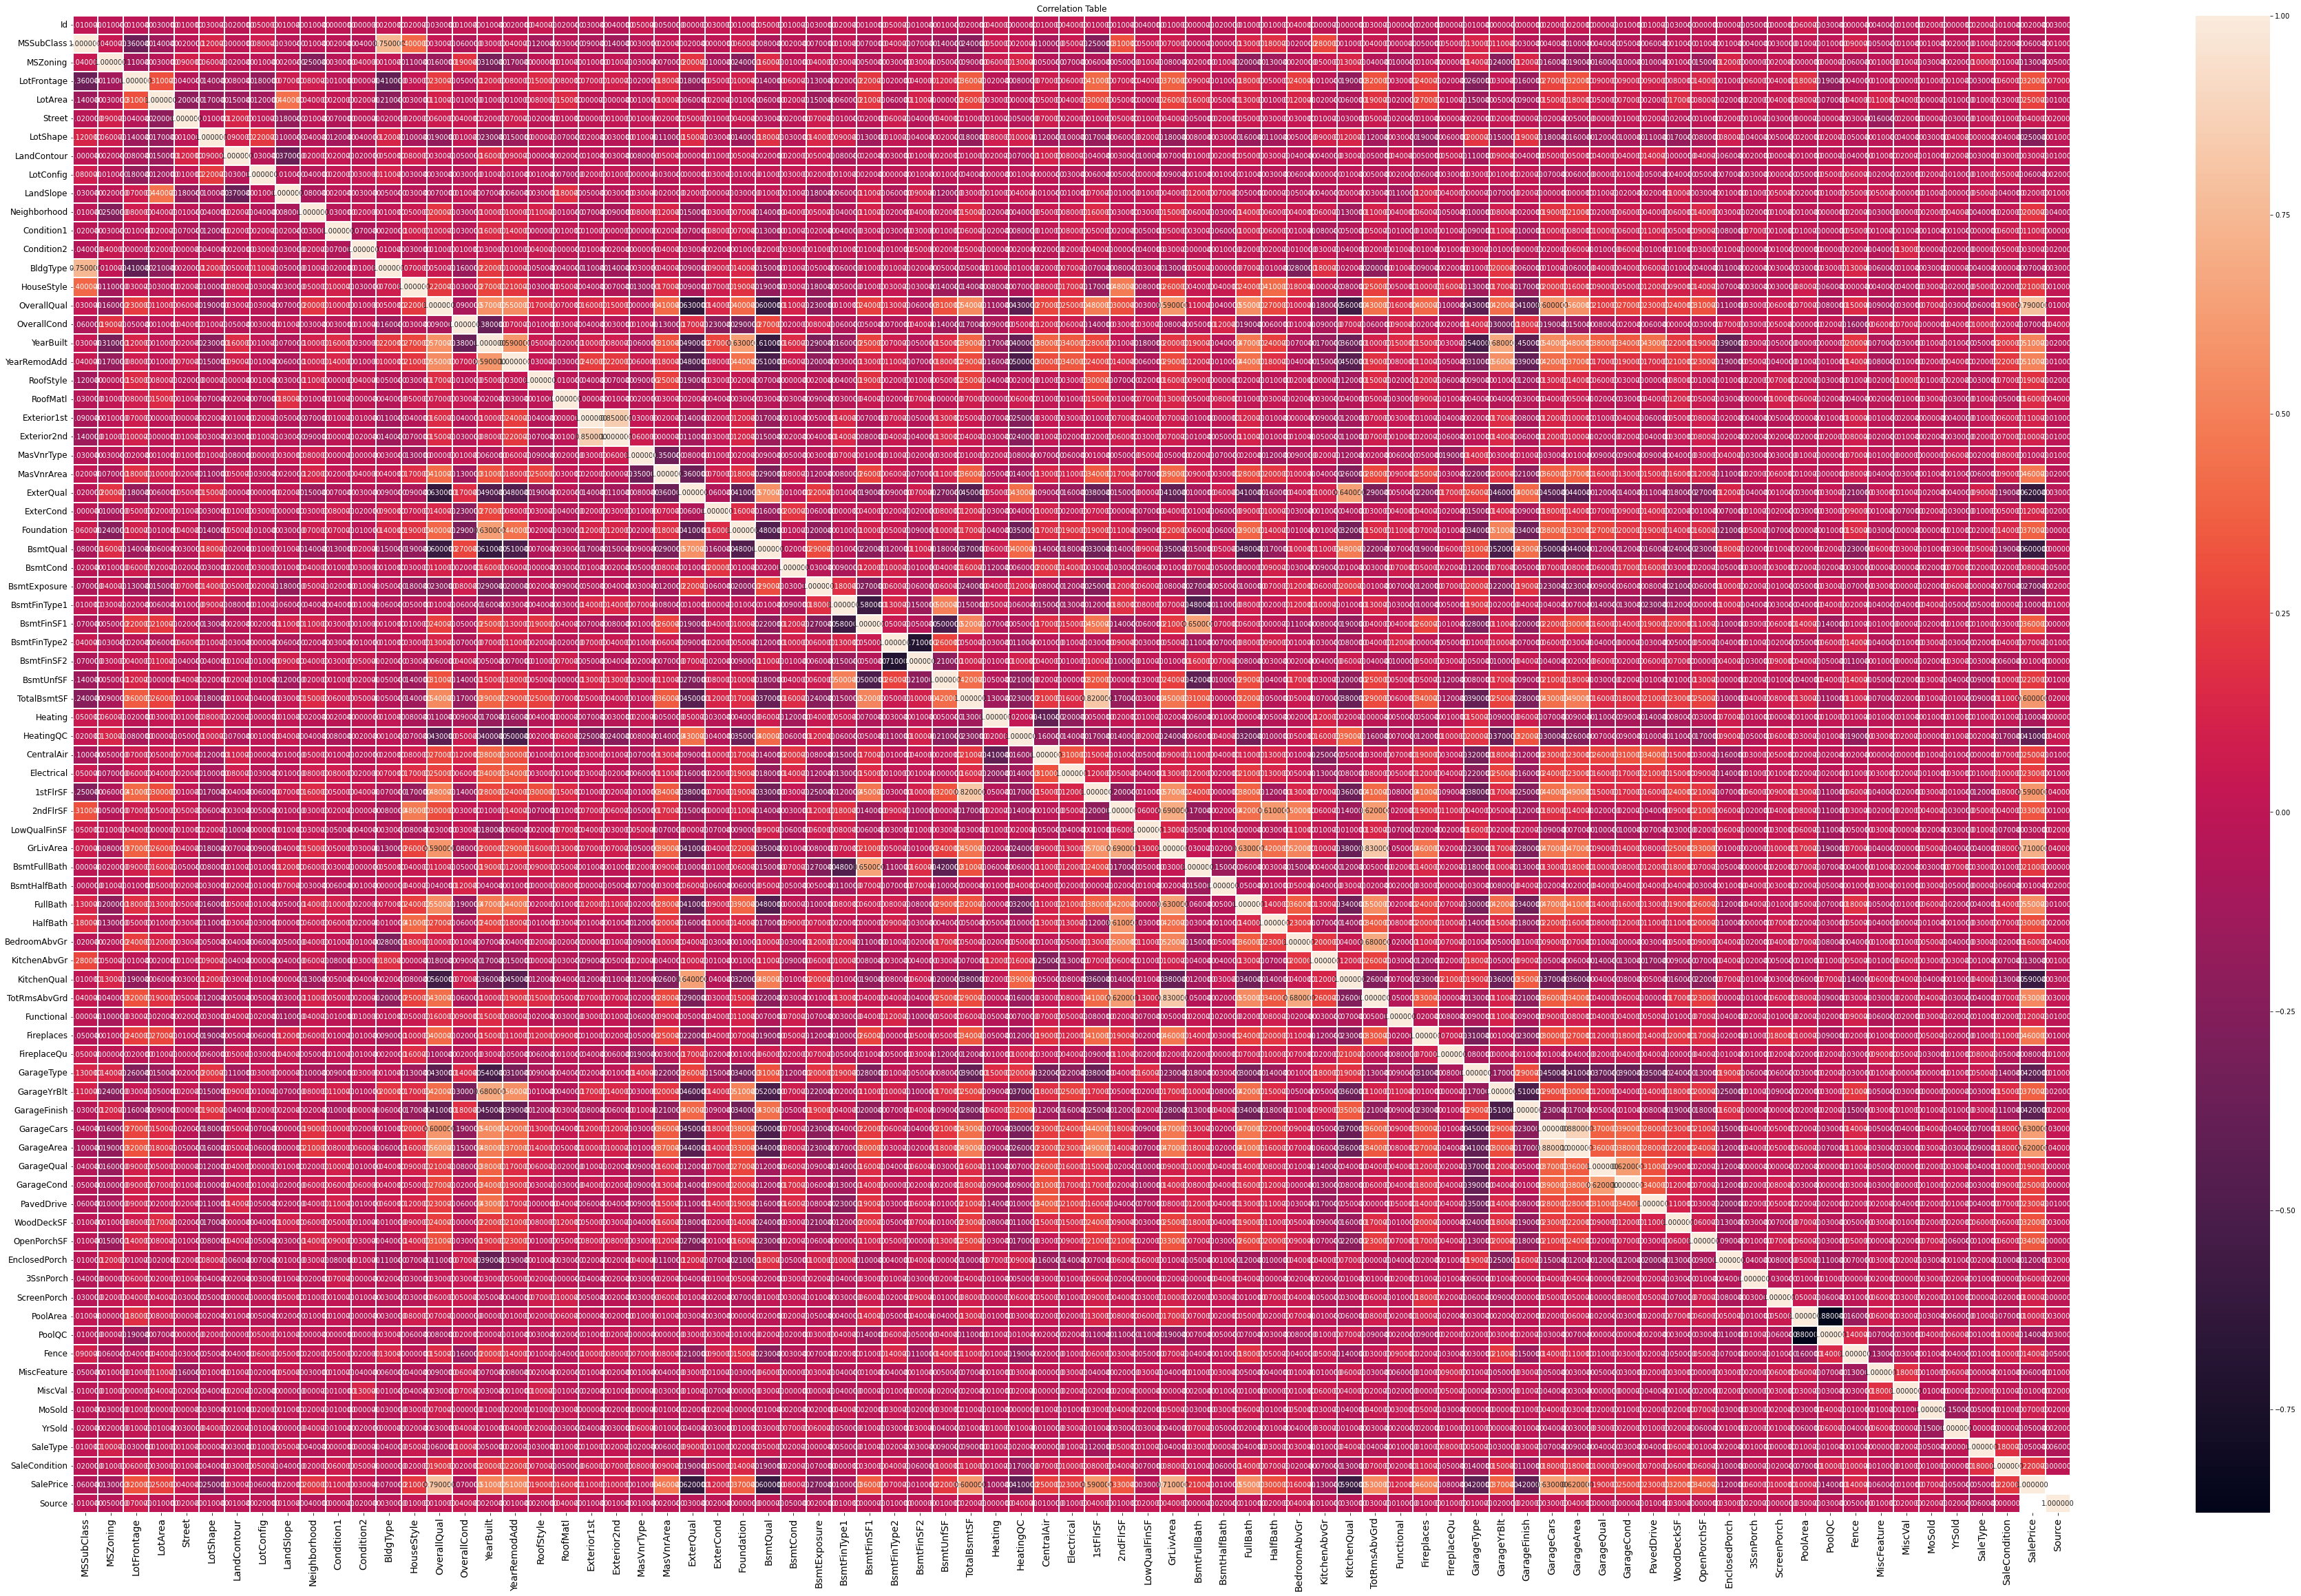

In [114]:
#Plotting a heatmap for the corelation matrix
plt.figure(figsize=[65,40])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot= True, linewidths=0.45, linecolor='white', fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Correlation Table')
plt.show()

## Splitting the dataset into training and test dataset:

In [115]:
#training dataset:

train_data = df[:1168]

train_data = train_data.drop(['Source'],axis = 1)

train_data.tail()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1163  289          20         3    70.049958     9819       1         0   
1164  554          20         3    67.000000     8777       1         3   
1165  196         160         3    24.000000     2280       1         3   
1166   31          70         0    50.000000     8500       1         3   
1167  617          60         3    70.049958     7861       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1163            3          4          0            19           2           2   
1164            3          4          0             7           1           2   
1165            3          2          0            13           2           2   
1166            3          4          0             9           1           2   
1167            3          4          0             8           2           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1163         0           2            5            5       1967          1967   
1164         0           2            4            5       1949          2003   
1165         3           5            6            6       1976          1976   
1166         0           5            4            4       1920          1950   
1167         0           5            6            5       2002          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
1163          1         1            8            8           1        31.0   
1164          1         1           12           13           2         0.0   
1165          1         1            9            2           2         0.0   
1166          2         1            3            3           2         0.0   
1167          1         1           12           13           2         0.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
1163          3          2           1         4         4             4   
1164          3          4           1         3         2             3   
1165          3          4           1         2         4             4   
1166          3          1           0         4         4             4   
1167          2          4           2         2         4             4   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1163             1         450             6           0        432   
1164             4           0             4           0          0   
1165             0         566             6           0        289   
1166             6           0             6           0        649   
1167             2         457             6           0        326   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
1163          882        1          4           1           4       900   
1164            0        1          0           1           4      1126   
1165          855        1          4           1           4       855   
1166          649        1          4           0           4       649   
1167          783        1          0           1           4       807   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1163         0             0        900             0             0         1   
1164         0             0       1126             0             0         2   
1165       601             0       1456             0             0         2   
1166       668             0       1317             0             0         1   
1167       702             0       1509             1             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
1163         0             3             1            3             5   
1164         0             2             1            2             5   
1165         1             3             1            3           

In [116]:
#test dataset:

test_data = df[1168:]
test_data = test_data.drop(['Source','SalePrice'],axis=1)

test_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1168   337          20         3    86.000000    14157       1         0   
1169  1018         120         3    70.049958     5814       1         0   
1170   929          20         3    70.049958    11838       1         3   
1171  1148          70         3    75.000000    12000       1         3   
1172  1227          60         3    86.000000    14598       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1168            1          0          0            22           2           2   
1169            3          1          0            22           2           2   
1170            3          4          0             5           2           2   
1171            0          4          0             6           2           2   
1172            3          1          0            21           1           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1168         0           2            9            5       2005          2006   
1169         4           2            8            5       1984          1984   
1170         0           2            8            5       2001          2001   
1171         0           5            7            7       1941          1950   
1172         0           5            6            5       2007          2007   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
1168          3         1           12           13           3       200.0   
1169          1         1            6            6           2         0.0   
1170          3         1           12           13           2         0.0   
1171          1         1            8            8           2         0.0   
1172          1         1           12           13           3        74.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
1168          2          4           2         0         4             1   
1169          2          4           1         2         4             0   
1170          2          4           2         2         4             0   
1171          3          4           1         4         4             4   
1172          2          4           2         2         4             2   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1168             2        1249             6           0        673   
1169             2        1036             6           0        184   
1170             6           0             6           0       1753   
1171             5         275             6           0        429   
1172             6           0             6           0        894   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
1168         1922        1          0           1           4      1922   
1169         1220        1          2           1           4      1360   
1170         1753        1          0           1           4      1788   
1171          704        1          0           1           4       860   
1172          894        1          0           1           4       894   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1168         0             0       1922             1             0         2   
1169         0             0       1360             1             0         1   
1170         0             0       1788             0             0         2   
1171       704             0       1564             0             0         1   
1172      1039             0       1933             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
1168         0             3             1            2             8   
1169         0             1             1            2             4   
1170         0             3             1            0      

## Checking for the skewness & Outliers: (Training dataset)

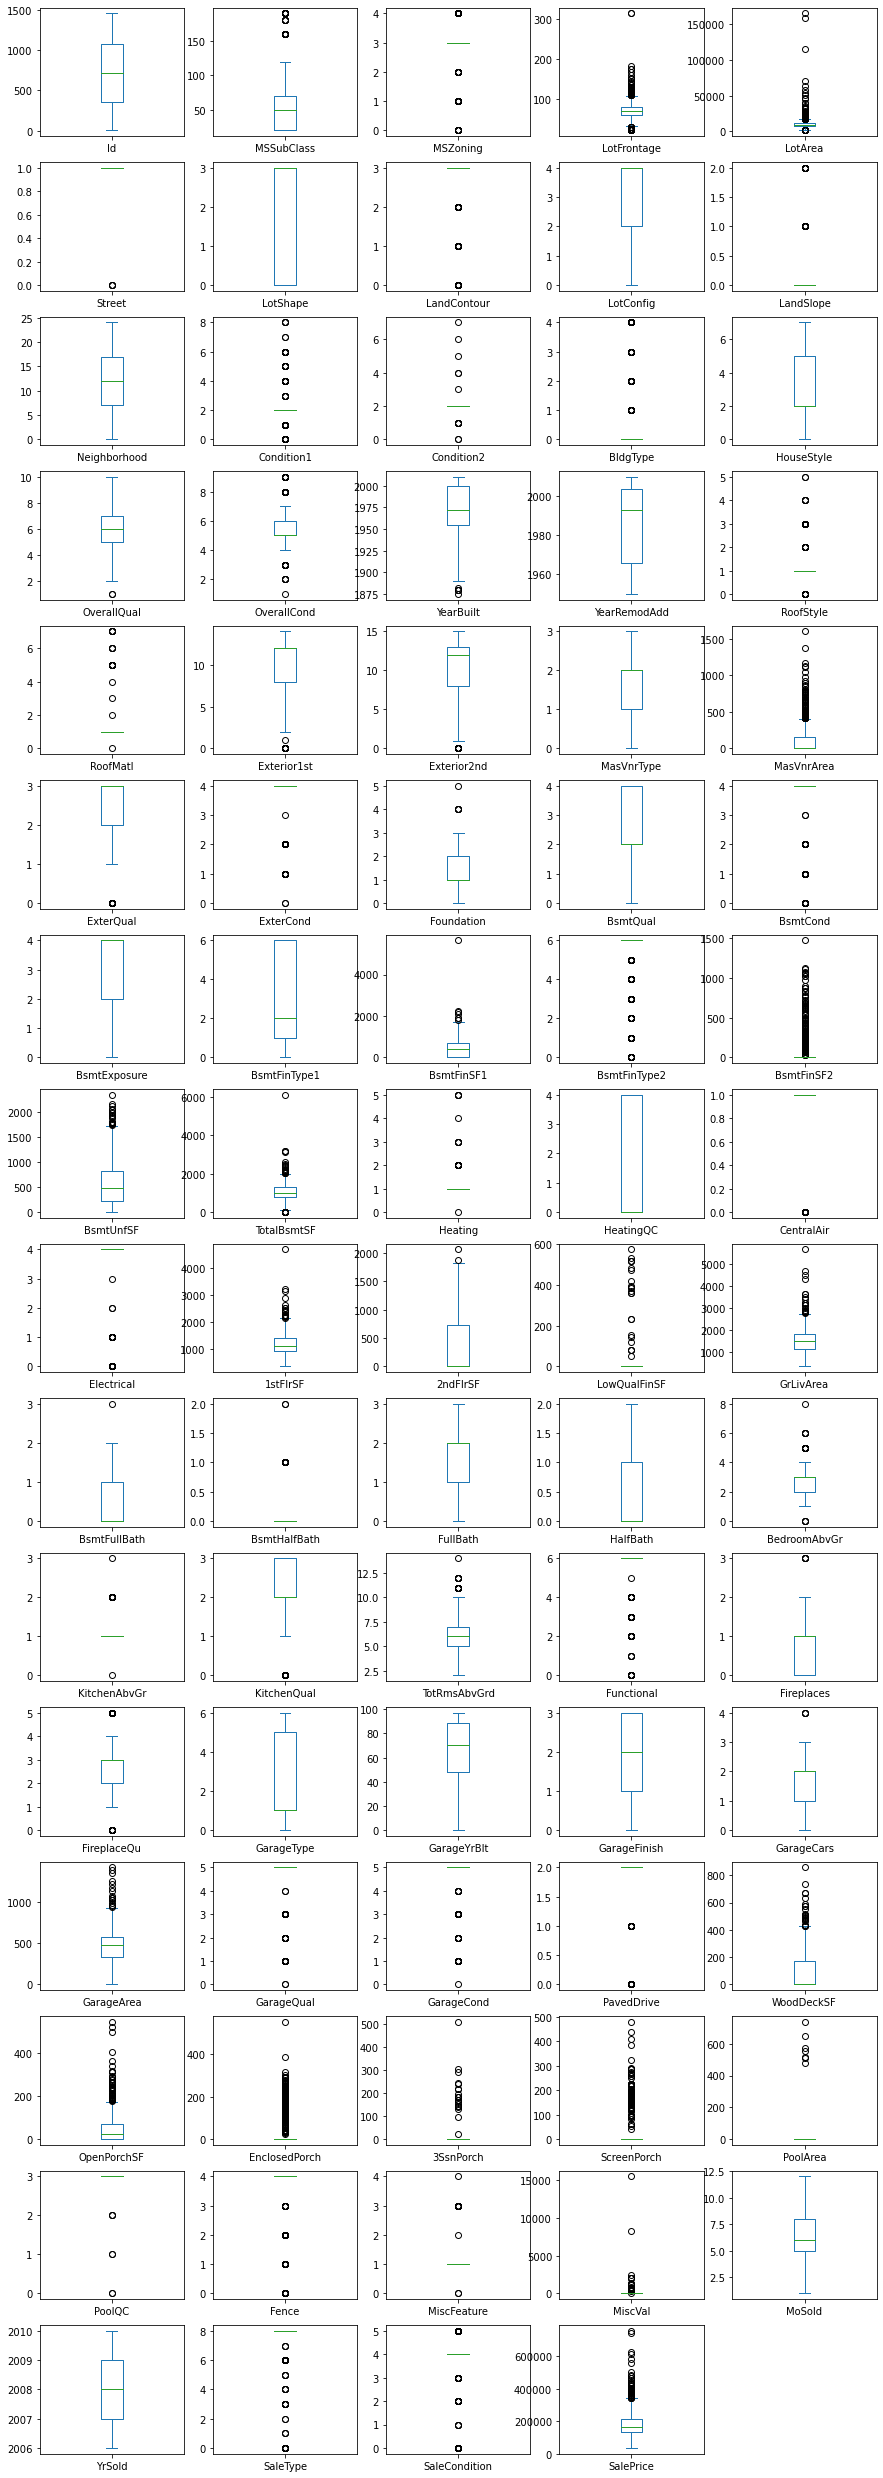

In [117]:
# Checking for the outliers

train_data.plot(kind='box', subplots=True, layout=(16,5), sharex=False, legend=True, figsize=(15,45))
plt.show()

The dataset contains outliers.

Taking the threshold value for the skewness as +/-0.5

We can say that our dataset have skewness.

## Data Cleaning

### Removing Outliers using zscore method

In [118]:
from scipy.stats import zscore

z = np.abs(zscore(train_data))
z.shape

(1168, 79)

In [119]:
thershold = 6
print(np.where (z>6))

(array([   1,   20,   22,   32,   32,   33,   51,   51,   63,   66,   95,
         98,  103,  103,  103,  113,  113,  119,  119,  141,  141,  141,
        142,  206,  211,  211,  214,  214,  226,  228,  253,  255,  272,
        279,  310,  310,  310,  320,  333,  356,  361,  363,  370,  396,
        418,  429,  441,  441,  443,  463,  478,  481,  488,  493,  500,
        500,  507,  510,  532,  534,  544,  553,  562,  563,  572,  572,
        572,  572,  591,  592,  592,  592,  592,  592,  592,  592,  614,
        614,  637,  639,  652,  686,  689,  689,  691,  691,  699,  713,
        716,  721,  722,  759,  769,  794,  821,  824,  833,  833,  834,
        839,  846,  888,  897,  899,  911,  920,  920,  935,  944,  952,
        952,  956,  961, 1008, 1023, 1038, 1038, 1046, 1047, 1053, 1053,
       1080, 1082, 1094, 1098, 1108, 1120, 1120, 1120, 1120, 1123, 1123,
       1123, 1139, 1142], dtype=int64), array([20, 67, 34, 12, 73, 43, 65, 68, 67, 43, 34, 67, 20, 43, 68,  4,  9,
       2

In [120]:
# Assigning the values to df_new which are less of thershold value and removing the outliers
train_new = train_data[(z<6).all(axis=1)]
print(train_data.shape)
print(train_new.shape)

print ('Shape after removing the outliers is ', train_new.shape)

(1168, 79)
(1069, 79)
Shape after removing the outliers is  (1069, 79)


In [121]:
# Checking percentage of data loss:

loss_per = ((1168-1069)/1168)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  8.476027397260275


In [122]:
# Dividing the independent and dependent variables

x=train_data.drop('SalePrice',axis=1)
y=train_data['SalePrice']

In [123]:
# Checking for the skewness.

x.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.732333
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.750566
Exterior2nd      -0.699672
MasVnrType       -0.104609
MasVnrArea        2.834520
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -0.487530
BsmtCond         -2.816444
BsmtExposure     -0.960565
BsmtFinType1      0.100811
BsmtFinSF1        1.871606
BsmtFinType2     -3.144813
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
H

In [124]:
from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.89957552,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14807039,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

## Model Building

### Splitting into train_test_split

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=95)

## 1. Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x_train, y_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [ 8.03496869e+02 -1.19961135e+02 -4.36800281e+02 -4.82745484e+02
  5.33397158e+03  1.45955657e+03  1.07201073e+03  2.81743726e+03
 -1.00088620e+03  1.46488990e+03  1.56308131e+03 -2.44956365e+02
 -1.56755413e+03 -4.76341619e+03 -1.56478081e+03  1.62532282e+04
  5.34729698e+03 -1.52311846e+03  2.02118371e+02  6.36279574e+03
  1.29198997e+04 -3.29151156e+02 -2.05749393e+03  8.90902501e+02
  1.59991440e+02 -4.86916759e+03  8.81565450e+02  1.73179753e+03
 -5.18303419e+03 -3.39761418e+02 -4.63040121e+03  1.16672629e+03
  6.45422644e+03 -9.19754190e+03 -9.52733468e+03 -4.00058106e+03
  1.41449745e+04 -1.11979305e+03 -2.24776279e+03  7.81885080e+02
 -1.71137553e+03 -1.30579864e+03 -1.52269048e+02 -2.30749503e+03
  1.71748287e+04  1.62406678e+03 -1.68611398e+03  3.24877544e+03
  5.01673272e+03 -1.63265173e+03 -1.76669706e+03 -5.88386532e+03
  3.37684514e+03  3.24350537e+03  4.17286688e+03 -3.15326574e+03
  2.47790946e+03  3.22157731e+03 -2.70673542e+03  8.83442597e+03
  3

In [127]:
# Predicting the new result

LR_pred = LR.predict(x_test)
LR_pred

array([256732.65295436, 204205.59045436, 109844.09045436, 246400.52795436,
       107872.52795436, 184972.21545436, 337703.15295436, 139665.46545436,
       167618.09045436, 225305.09045436, 186911.59045436, 313819.02795436,
       140013.15295436, 199285.34045436, 195308.65295436,  78334.21545436,
       126649.27795436, 140281.59045436, 317608.27795436, 140208.21545436,
        83334.71545436, 195321.09045436, 168184.71545436, 198889.27795436,
       202725.09045436, 299472.71545436, 117967.52795436, 106939.09045436,
       139958.15295436, 165189.59045436, 228208.46545436,  94135.15295436,
       248584.27795436, 232502.21545436, 196447.21545436, 175333.27795436,
       176088.09045436, 146050.34045436, 242095.90295436, 144039.21545436,
       115080.96545436, 103997.52795436, 266923.27795436, 129088.71545436,
       150530.46545436,  58015.71545436, 329319.65295436, 218162.27795436,
       152240.02795436, 189474.77795436, 238524.40295436, 215461.34045436,
       286208.96545436, 3

## 2. Lasso

In [128]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(x_train, y_train)

# Predicting the new results

ls_pred = ls.predict(x_test)
ls_pred

array([256688.08817155, 204223.08659   , 109890.38811304, 246407.94173583,
       107883.22300311, 184983.46133061, 337732.2089803 , 139640.78262227,
       167653.44223094, 225273.71254572, 186903.86792293, 313805.20605809,
       140009.71288715, 199305.45289377, 195258.14272947,  78345.80172911,
       126658.7024441 , 140330.61824404, 317592.78030951, 140199.07543347,
        83326.89017777, 195280.652163  , 168188.21786071, 198854.3630583 ,
       202780.11892162, 299447.88839209, 117983.21397872, 106944.83319864,
       139959.51467239, 165210.80449453, 228238.55930373,  94138.70949859,
       248577.59114329, 232522.80439988, 196442.51447149, 175344.92434395,
       176073.21292545, 146084.07640641, 242039.31062706, 144058.34493572,
       115106.14068428, 104041.26742747, 266912.54877247, 129155.99982369,
       150512.22586034,  58026.86336072, 329300.00986379, 218165.85571348,
       152259.36794295, 189455.87647037, 238506.76817475, 215455.34542988,
       286183.53435009, 3

## 3. DecissionTreeRegressor

In [129]:
from sklearn.tree import DecisionTreeRegressor #Importing the library

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

# Predicting the new result

DT_pred = DT.predict(x_test)
DT_pred

array([165000., 179540., 112000., 203000., 112000., 141000., 190000.,
       110000., 224000., 205000., 206900., 325300., 113000., 204900.,
       158500., 129000., 133000., 123000., 339750., 111250., 108959.,
       164000., 158000., 175000., 244000., 361919., 135000., 137500.,
       113000., 188000., 230000.,  82000., 236500., 191000., 181000.,
       189000., 176000., 167500., 215000., 136500., 128000., 140000.,
       250000., 147000., 126175.,  92000., 325624., 185000., 138500.,
       178000., 222500., 227680., 311872., 306000., 119000., 236500.,
       156000., 154000., 124900., 120000., 124500., 378500., 187750.,
       167900., 226700., 175000., 116900.,  98000., 215000., 155000.,
       110000., 260000., 240000., 103200., 611657., 125000., 240000.,
       154000., 167900., 426000., 110000., 122900., 256000., 121600.,
        92900., 128950., 149000., 125000., 175000., 100000., 263000.,
        88000., 148000., 194000., 119900., 140000., 169000., 141000.,
       260000., 2270

##    4. KNeighborsRegressor:

In [130]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train, y_train)

# Predicting the new result

KNN_pred = KNN.predict(x_test)
KNN_pred

array([497500. , 190637.5, 128500. , 185850. , 108500. , 135250. ,
       332500. , 112950. , 155450. , 196200. , 185250. , 299875. ,
       147250. , 208000. , 509985. , 104500. , 144600. ,  95691.5,
       262050. , 112000. , 103000. , 273900. , 151750. , 254500. ,
       196250. , 305000. , 142000. , 114250. , 113000. , 196000. ,
       293375. , 123500. , 225000. , 238250. , 146950. , 222250. ,
       158500. , 142950. , 145000. , 144750. , 115000. , 135950. ,
       301000. , 133500. , 144250. ,  86000. , 307000. , 210000. ,
       143450. , 146250. , 238250. , 237790. , 214000. , 191495. ,
        95000. , 221500. , 125250. , 155000. , 145000. , 117750. ,
       144450. , 431966.5, 205700. , 165750. , 234750. , 157475. ,
       193125. , 111250. , 218500. , 165500. , 117750. , 331875. ,
       231500. ,  86000. , 503044.5, 118954. , 174700. , 167975. ,
       174000. , 380500. , 126700. , 126450. , 189700. , 153500. ,
        98600. ,  86750. , 160250. , 110750. , 118000. , 10060

## 5. RandomForestRegressor:

In [131]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=42)

RF.fit(x_train,y_train)

# Predicting the new result

RF_pred = RF.predict(x_test)
RF_pred

array([152018.811756  , 203612.72279716, 143205.2902323 , 205982.26328349,
       143763.05656626, 209563.64111188, 205502.72175165, 150485.11194221,
       163303.81032812, 209537.30656935, 163303.81032812, 274393.6371864 ,
       148900.23334221, 206605.90343334, 150437.75412853, 128827.01487053,
       129961.13870096, 150081.71498632, 280165.71772777, 130411.89347053,
       130764.11164022, 264053.32885347, 133416.24018354, 164774.45722734,
       207448.12727862, 269602.50783888, 141930.58497411, 132727.20324515,
       162003.80344578, 164774.45722734, 262705.55632178, 129230.41182642,
       263860.1437495 , 210773.39263101, 164774.45722734, 205982.26328349,
       164774.45722734, 152800.42171683, 211870.96106693, 144582.71351743,
       162003.80344578, 144535.35570375, 273214.57011654, 129629.98780979,
       131125.93633315, 128827.01487053, 286416.32538585, 206605.90343334,
       148900.23334221, 204198.72499706, 207448.12727862, 205982.26328349,
       212920.09530163, 2

## Calculating MAE

In [132]:
from sklearn.metrics import mean_absolute_error

print(' Mean Absolute Error for LinearRegression is ', mean_absolute_error(y_test, LR_pred),
      '\n Mean Absolute Error for the Lasso is ', mean_absolute_error(y_test, ls_pred),
     '\n Mean Absolute Error for DecisionTreeRegressor is ', mean_absolute_error(y_test, DT_pred),
     '\n Mean Absolute Error for KNeighborsRegressor is ', mean_absolute_error(y_test, KNN_pred),
      '\n Mean Absolute Error for RandomForestRegressor is ', mean_absolute_error(y_test, RF_pred))

 Mean Absolute Error for LinearRegression is  22159.29907538 
 Mean Absolute Error for the Lasso is  22154.59984041892 
 Mean Absolute Error for DecisionTreeRegressor is  25141.286324786324 
 Mean Absolute Error for KNeighborsRegressor is  29492.096153846152 
 Mean Absolute Error for RandomForestRegressor is  30094.539950999737


We can see that the Mean Absilute error is least for Lasso (22154.599), so this can be considered as good model.

Also the Mean Absolute Error for LinearRegression is (22158.14), which is almost equal to the Lasso. So, let's check for Root Mean Squared Error and R2_Score to decide the best model.

## RMSE

In [133]:
from sklearn import metrics

rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
rmse_ls = np.sqrt(metrics.mean_squared_error(y_test, ls_pred))
rmse_DT = np.sqrt(metrics.mean_squared_error(y_test, DT_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, KNN_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, RF_pred))

print('Root Mean Squared Error for LinearRegression is ', rmse_LR)
print('Root Mean Squared Error for Lasso is ', rmse_ls)
print('Root Mean Squared Error for DecisionTreeRegressor is ', rmse_DT)
print('Root Mean Squared Error for KNeighborsRegressor is ', rmse_KNN)
print('Root Mean Squared Error for RandomForestRegressor is ', rmse_RF)

Root Mean Squared Error for LinearRegression is  32901.53300151949
Root Mean Squared Error for Lasso is  32896.55457436605
Root Mean Squared Error for DecisionTreeRegressor is  38180.173628401324
Root Mean Squared Error for KNeighborsRegressor is  54358.71132123481
Root Mean Squared Error for RandomForestRegressor is  44644.049167381185


#### We can see that the root mean square error is minimum for Lasso. So, we can say that Lasso is the best fit model. Let's check r2 score for more accurate decision.



## R2

In [134]:
from sklearn.metrics import r2_score

print(' R2_Score for LinearRegression is ', r2_score(y_test, LR_pred),
      '\n R2_Score for the Lasso is', r2_score(y_test, ls_pred),
      '\n R2_Score for DecisionTreeRegressor is ', r2_score(y_test, DT_pred),
      '\n R2_Score for KNeighborsRegressor is ', r2_score(y_test, KNN_pred), 
      '\n R2_Score for RandomForestRegressor is ', r2_score(y_test, RF_pred))

 R2_Score for LinearRegression is  0.8419024422928943 
 R2_Score for the Lasso is 0.8419502830805363 
 R2_Score for DecisionTreeRegressor is  0.7871034167409942 
 R2_Score for KNeighborsRegressor is  0.5684499232056501 
 R2_Score for RandomForestRegressor is  0.7089148507145988


R2_Score closest to 1.0 is considered as best. From the above observations we can see that the best R2_Score is for LinearRegression and Lasso (0.84).

So, as per our observations we can say that the best fit model for our dataset is Lasso.

## Model Saving

In [135]:
import pickle
filename = 'housing_price.pkl'
pickle.dump(ls, open(filename, 'wb'))

## Conclusion:

Checking the difference between the Original and Pridicted values

In [136]:
a = np.array(y_test)
predicted = np.array(ls.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

Original      Predicted
0    181000.0  256688.088172
1    176485.0  204223.086590
2    132000.0  109890.388113
3    184000.0  246407.941736
4    107400.0  107883.223003
5    205000.0  184983.461331
6    260000.0  337732.208980
7    116000.0  139640.782622
8    181900.0  167653.442231
9    230000.0  225273.712546
10   158000.0  186903.867923
11   354000.0  313805.206058
12   130000.0  140009.712887
13   214000.0  199305.452894
14   171000.0  195258.142729
15   106500.0   78345.801729
16   124500.0  126658.702444
17   147000.0  140330.618244
18   372500.0  317592.780310
19   102000.0  140199.075433
20    60000.0   83326.890178
21   230000.0  195280.652163
22   179900.0  168188.217861
23   185000.0  198854.363058
24   200000.0  202780.118922
25   281213.0  299447.888392
26   133000.0  117983.213979
27   125000.0  106944.833199
28   128000.0  139959.514672
29   177000.0  165210.804495
30   215000.0  228238.559304
31   101000.0   94138.709499
32   251000.0  248577.591143
33   179900.0  232522.804400
34   185750.0  196442.514471
35   180500.0  175344.924344
36   185000.0  176073.212925
37   163000.0  146084.076406
38   266500.0  242039.310627
39   135000.0  144058.344936
40   104000.0  115106.140684
41   104900.0  104041.267427
42   275500.0  266912.548772
43   160000.0  129155.999824
44   157000.0  150512.225860
45    81000.0   58026.863361
46   350000.0  329300.009864
47   208500.0  218165.855713
48   142000.0  152259.367943
49   161000.0  189455.876470
50   225000.0  238506.768175
51   182000.0  215455.345430
52   335000.0  286183.534350
53   394617.0  343797.486489
54   105500.0  113115.082825
55   278000.0  254682.927777
56   129000.0  144167.962869
57   147500.0  162388.293272
58   139000.0  165453.588511
59   127000.0   90055.686545
60   119900.0  104648.762739
61   485000.0  370135.941903
62   188000.0  205968.047486
63   143000.0  179681.528201
64   235000.0  240855.424117
65   174900.0  163532.679988
66   140000.0  186609.479112
67    87000.0   97820.994673
68   222000.0  241557.270964
69   144000.0  141484.782497
70   100000.0   86550.932158
71   403000.0  295047.979185
72   189000.0  206117.625265
73    75500.0   58308.355015
74   501837.0  373599.518255
75   142000.0  177342.501796
76   241500.0  217949.750459
77   168500.0  234843.201720
78   172000.0  163441.233784
79   451950.0  372324.607827
80   130000.0  125628.177972
81   110000.0  161980.347586
82   240000.0  218305.975876
83   129000.0  102898.587672
84    37900.0   42974.380368
85    88000.0   75238.221841
86   139400.0  120981.616551
87   109900.0  129930.886946
88   137500.0  143254.031764
89    85000.0   94639.192374
90   222000.0  217531.928541
91    75000.0   53096.920177
92   148000.0  138954.287295
93   160000.0  149714.380147
94   129900.0  105642.495332
95   145000.0  124838.719340
96   168000.0  169727.885662
97   135960.0  130319.230484
98   290000.0  252267.608174
99   168000.0  217916.388930
100  128000.0  112542.455523
101  266000.0  265171.795891
102  187500.0  206046.189776
103  107500.0   92911.107812
104  235128.0  245809.585102
105  310000.0  294178.886829
106  194500.0  212063.286132
107  160000.0  142173.251730
108   39300.0   -9798.293333
109  131400.0  146571.327957
110  201800.0  214748.039394
111  193000.0  207449.357478
112  309000.0  296532.631731
113  182900.0  215638.219527
114  127000.0  129741.098674
115  318000.0  272202.443213
116  149350.0  126187.343475
117  181000.0  178565.263339
118  213490.0  196138.308176
119  216000.0  218814.474241
120  157900.0  135377.584043
121  213000.0  219578.381477
122  178400.0  212207.690005
123  124500.0  132600.831008
124  392000.0  259637.982415
125  239000.0  216280.205067
126  133500.0  127107.004218
127  241500.0  219723.255608
128  266000.0  272358.824304
129   79000.0   90527.335583
130  260000.0  255858.597662
131  131000.0  123293.725911
132  209500.0  218956.369059
133  144000.0  149075.928667
134  195000.0  193147.854882
135  114500.0  115515.531519
136  112000.0   65569.119764
137

<AxesSubplot:ylabel='Density'>

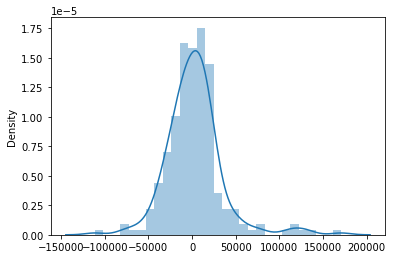

In [137]:
sns.distplot(a-predicted)

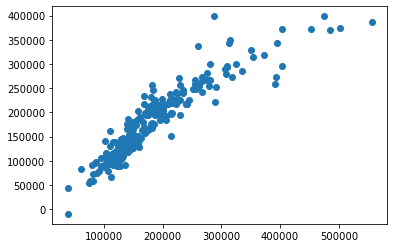

In [138]:
# We are getting an almost normal distribution in our predicted values
plt.scatter(a,predicted)